# Problem 1: Sparse Encoding for Image Denoising (30pts)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # Added tqdm
import random

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Hyperparameters
input_dim = 28 * 28  # MNIST images are 28x28
hidden_dim = int(1.5 * input_dim)  # 1.5 times the input dimension
batch_size = 128
learning_rate = 1e-3
num_epochs = 20
sigma = 0.5  # Standard deviation for Gaussian noise
lambda_l1 = 1e-3  # Regularization parameter for L1 loss

# Device configuration
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transform,
                              download=True)

# Data loaders
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

# Define the Auto-Encoder model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        # Encoder: Linear layer followed by ReLU
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        # Decoder: Linear layer
        self.decoder = nn.Linear(hidden_dim, input_dim)
    
    def forward(self, x):
        h = self.encoder(x)
        out = self.decoder(h)
        return out, h

# Initialize the model, loss function, and optimizer
model = AutoEncoder(input_dim, hidden_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with tqdm
model.train()
for epoch in tqdm(range(num_epochs), desc="Epochs"):
    total_loss = 0
    for batch_idx, (data, _) in enumerate(tqdm(train_loader, desc="Batches", leave=False)):
        # Flatten the images
        data = data.view(-1, input_dim).to(device)
        # Add Gaussian noise
        noise = torch.randn_like(data) * sigma
        noisy_data = data + noise
        noisy_data = torch.clamp(noisy_data, 0., 1.)  # Ensure values are between 0 and 1

        # Forward pass
        outputs, h = model(noisy_data)
        mse_loss = criterion(outputs, data)
        l1_loss = torch.mean(torch.abs(h))
        loss = mse_loss + lambda_l1 * l1_loss

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Switch to evaluation mode
model.eval()

# Function to add Gaussian noise
def add_noise(x, sigma):
    noise = torch.randn_like(x) * sigma
    noisy = x + noise
    noisy = torch.clamp(noisy, 0., 1.)
    return noisy

Using device: mps


Epochs:   5%|▌         | 1/20 [00:03<00:59,  3.13s/it]

Epoch [1/20], Loss: 0.0266


Epochs:  10%|█         | 2/20 [00:06<00:57,  3.20s/it]

Epoch [2/20], Loss: 0.0189


Epochs:  15%|█▌        | 3/20 [00:09<00:51,  3.01s/it]

Epoch [3/20], Loss: 0.0176


Epochs:  20%|██        | 4/20 [00:11<00:46,  2.91s/it]

Epoch [4/20], Loss: 0.0169


Epochs:  25%|██▌       | 5/20 [00:14<00:42,  2.83s/it]

Epoch [5/20], Loss: 0.0163


Epochs:  30%|███       | 6/20 [00:17<00:38,  2.78s/it]

Epoch [6/20], Loss: 0.0160


Epochs:  35%|███▌      | 7/20 [00:19<00:35,  2.75s/it]

Epoch [7/20], Loss: 0.0157


Epochs:  40%|████      | 8/20 [00:22<00:32,  2.73s/it]

Epoch [8/20], Loss: 0.0155


Epochs:  45%|████▌     | 9/20 [00:25<00:29,  2.71s/it]

Epoch [9/20], Loss: 0.0154


Epochs:  50%|█████     | 10/20 [00:28<00:27,  2.70s/it]

Epoch [10/20], Loss: 0.0152


Epochs:  55%|█████▌    | 11/20 [00:30<00:24,  2.69s/it]

Epoch [11/20], Loss: 0.0151


Epochs:  60%|██████    | 12/20 [00:33<00:21,  2.69s/it]

Epoch [12/20], Loss: 0.0150


Epochs:  65%|██████▌   | 13/20 [00:36<00:18,  2.69s/it]

Epoch [13/20], Loss: 0.0149


Epochs:  70%|███████   | 14/20 [00:38<00:16,  2.68s/it]

Epoch [14/20], Loss: 0.0148


Epochs:  75%|███████▌  | 15/20 [00:41<00:13,  2.68s/it]

Epoch [15/20], Loss: 0.0148


Epochs:  80%|████████  | 16/20 [00:44<00:11,  2.84s/it]

Epoch [16/20], Loss: 0.0147


Epochs:  85%|████████▌ | 17/20 [00:47<00:08,  2.89s/it]

Epoch [17/20], Loss: 0.0147


Epochs:  90%|█████████ | 18/20 [00:50<00:05,  2.98s/it]

Epoch [18/20], Loss: 0.0147


Epochs:  95%|█████████▌| 19/20 [00:53<00:03,  3.02s/it]

Epoch [19/20], Loss: 0.0147


Epochs: 100%|██████████| 20/20 [00:56<00:00,  2.84s/it]

Epoch [20/20], Loss: 0.0146


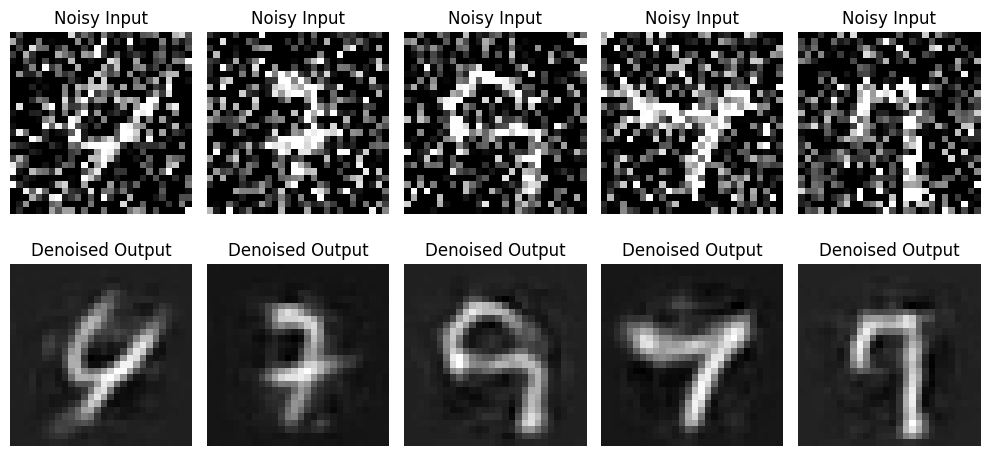

In [9]:
# 1. Plot 5 input-output pairs using the test set


# Get a batch from the test loader
test_iter = iter(test_loader)
test_images, _ = next(test_iter)
test_images = test_images.view(-1, input_dim).to(device)

# Select 5 random samples
indices = random.sample(range(test_images.size(0)), 5)
sample_images = test_images[indices]
noisy_samples = add_noise(sample_images, sigma)

# Pass through the auto-encoder
with torch.no_grad():
    reconstructed, _ = model(noisy_samples)

# Move to CPU and reshape for plotting
sample_images = sample_images.cpu().numpy()
noisy_samples = noisy_samples.cpu().numpy()
reconstructed = reconstructed.cpu().numpy()

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    # Noisy input
    axes[0, i].imshow(noisy_samples[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title('Noisy Input')
    axes[0, i].axis('off')
    
    # Denoised output
    axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Denoised Output')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

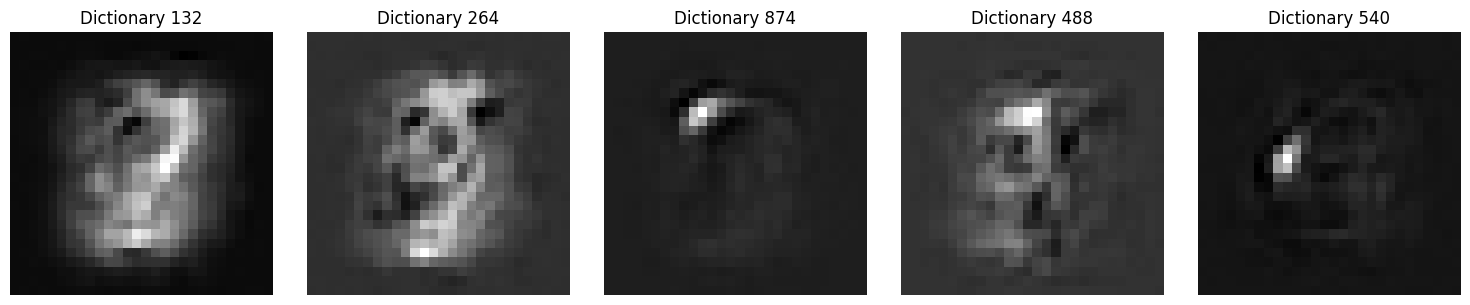

In [13]:
# 2. Plot the top 5 dictionary vectors in D with the largest corresponding |h_i|
# First, gather all h from the test set
all_h = []
with torch.no_grad():
    for data, _ in test_loader:
        data = data.view(-1, input_dim).to(device)
        noisy_data = add_noise(data, sigma)
        _, h = model(noisy_data)
        all_h.append(torch.abs(h))
# Concatenate all h
all_h = torch.cat(all_h, dim=0)  # Shape: [num_test_samples, hidden_dim]

# Compute average |h_i| across all test samples
avg_h = torch.mean(all_h, dim=0)  # Shape: [hidden_dim]

# Get the indices of top 5 h_i
top5_indices = torch.topk(avg_h, 5).indices.cpu().numpy()

# Get the corresponding dictionary vectors from D (decoder weights)
# Decoder weight shape: [input_dim, hidden_dim]
D = model.decoder.weight.data.cpu().numpy().T  # Shape: [hidden_dim, input_dim]

top5_D = D[top5_indices]  # Shape: [5, input_dim]

# Plot the top 5 dictionary vectors
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(top5_D[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Dictionary {top5_indices[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Probem 2: Modified Probablistic PCA on MNIST (30pts)

In [14]:
class PPCA(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(PPCA, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        
        # Initialize W, mu, and log_sigma as learnable parameters
        self.W = nn.Parameter(torch.randn(input_dim, latent_dim) * 0.01)
        self.mu = nn.Parameter(torch.zeros(input_dim))
        self.log_sigma = nn.Parameter(torch.zeros(input_dim))  # Log to ensure positivity

    def forward(self, x):
        """
        Computes the negative log-likelihood for PPCA.
        """
        # Compute Sigma = W W^T + diag(sigma^2)
        sigma = torch.exp(self.log_sigma)  # Ensure positivity
        Sigma = self.W @ self.W.t() + torch.diag(sigma ** 2)  # Shape: [D, D]

        # Compute (x - mu)
        x_centered = x - self.mu  # Shape: [batch_size, D]

        # Compute Sigma inverse and log determinant using Cholesky decomposition
        # Adding a small epsilon for numerical stability
        epsilon = 1e-6
        try:
            L = torch.linalg.cholesky(Sigma + epsilon * torch.eye(self.input_dim).to(Sigma.device))
        except RuntimeError as e:
            print("Cholesky decomposition failed. Adding more epsilon.")
            L = torch.linalg.cholesky(Sigma + (epsilon*10) * torch.eye(self.input_dim).to(Sigma.device))
        
        # Solve for y: L y = (x - mu).T
        # Since Sigma is the same for all samples in the batch, we can compute y for the entire batch at once
        # y = L^{-1} (x - mu).T
        # Compute log determinant: log det(Sigma) = 2 * sum(log(diag(L)))
        log_det_Sigma = 2.0 * torch.sum(torch.log(torch.diagonal(L, dim1=0, dim2=1)))
        
        # Compute quadratic term: (x - mu)^T Sigma^{-1} (x - mu)
        # First solve L y = (x - mu).T for y
        y = torch.linalg.solve_triangular(L, x_centered.t(), upper=False)  # Shape: [D, batch_size]
        # Then compute squared Mahalanobis distance
        quad_form = torch.sum(y ** 2, dim=0)  # Shape: [batch_size]
        
        # Compute negative log-likelihood
        # NLL = 0.5 * (quad_form + log_det_Sigma + D * log(2*pi))
        nll = 0.5 * (quad_form + log_det_Sigma + self.input_dim * torch.log(torch.tensor(2.0 * np.pi)))
        # Return average NLL over the batch
        return torch.mean(nll)

In [20]:
# Assuming the necessary libraries are already imported as per your instruction.

# Define the PPCA model
class PPCA(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(PPCA, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        
        # Initialize W, mu, and log_sigma as learnable parameters
        # W: [D, n], initialized with small random values
        self.W = nn.Parameter(torch.randn(input_dim, latent_dim) * 0.01)
        # mu: [D], initialized to zeros
        self.mu = nn.Parameter(torch.zeros(input_dim))
        # log_sigma: [D], initialized to zeros to ensure sigma = 1 initially
        self.log_sigma = nn.Parameter(torch.zeros(input_dim))  # Log to ensure positivity

    def forward(self, x):
        """
        Computes the negative log-likelihood for PPCA as per the provided formula:
        \[
        \ell (W, \mu, \sigma^2) = \sum_{i=1}^N \left( \frac{1}{2} \log |C| + \frac{1}{2} (x^{(i)} - \mu)^T C^{-1} (x^{(i)} - \mu) \right)
        \]
        where \( C = W W^T + \text{diag}(\sigma^2) \).
        """
        # Compute sigma = exp(log_sigma) to ensure positivity
        sigma = torch.exp(self.log_sigma)  # Shape: [D]
        # Construct covariance matrix C = W W^T + diag(sigma^2)
        C = self.W @ self.W.t() + torch.diag(sigma ** 2)  # Shape: [D, D]
        
        # Compute (x - mu)
        x_centered = x - self.mu  # Shape: [batch_size, D]
        
        # Compute log determinant of C using Cholesky decomposition
        # Add a small epsilon to the diagonal for numerical stability
        epsilon = 1e-6
        try:
            L = torch.linalg.cholesky(C + epsilon * torch.eye(self.input_dim).to(C.device))
        except RuntimeError as e:
            print("Cholesky decomposition failed. Adding more epsilon.")
            L = torch.linalg.cholesky(C + (epsilon * 10) * torch.eye(self.input_dim).to(C.device))
        
        # Compute log |C| = 2 * sum(log(diag(L)))
        log_det_C = 2.0 * torch.sum(torch.log(torch.diagonal(L)))
        
        # Solve for y: L y = (x - mu).T
        # Using torch.triangular_solve for better numerical stability
        y = torch.linalg.solve_triangular(L, x_centered.t(), upper=False)  # Shape: [D, batch_size]
        
        # Compute quadratic term: sum over batch of (y^T y)
        # Each y[:, i] corresponds to a sample
        quad_form = torch.sum(y ** 2, dim=0)  # Shape: [batch_size]
        
        # Compute the loss as per the provided formula (excluding D * log(2*pi))
        # Each sample contributes: 0.5 * log_det_C + 0.5 * quad_form
        # Sum over all samples
        loss = 0.5 * log_det_C * x.size(0) + 0.5 * torch.sum(quad_form)
        
        return loss

# Define the training function
def train_ppca(latent_dim, train_loader, device, num_epochs=50, learning_rate=1e-3):
    input_dim = 28 * 28  # MNIST images are 28x28
    model = PPCA(input_dim=input_dim, latent_dim=latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False) as tepoch:
            for batch_idx, (data, _) in enumerate(tepoch):
                data = data.view(-1, input_dim).to(device)  # Flatten the images
                optimizer.zero_grad()
                loss = model(data)
                loss.backward()
                optimizer.step()
                
                epoch_loss += loss.item()
                tepoch.set_postfix(loss=loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}")
    return model

# Define visualization functions
def visualize_latent_space(model, test_loader, device, latent_dim, n_components=2):
    """
    Projects the test set into the latent space and visualizes it.
    For n_components=2, creates a 2D scatter plot.
    For higher dimensions, applies PCA for visualization.
    """
    model.eval()
    latent_representations = []
    labels_list = []
    with torch.no_grad():
        for data, labels in test_loader:
            data = data.view(-1, 28*28).to(device)
            # Compute posterior mean of z given x
            # E[z | x] = (W^T C^{-1}) (x - mu)
            # First compute C^{-1} (x - mu)
            sigma = torch.exp(model.log_sigma)
            C = model.W @ model.W.t() + torch.diag(sigma ** 2).to(device)
            # Compute Cholesky decomposition
            epsilon = 1e-6
            try:
                L = torch.linalg.cholesky(C + epsilon * torch.eye(model.input_dim).to(device))
            except RuntimeError as e:
                print("Cholesky decomposition failed during latent projection. Adding more epsilon.")
                L = torch.linalg.cholesky(C + (epsilon * 10) * torch.eye(model.input_dim).to(device))
            # Solve L y = (x - mu).T
            y = torch.linalg.solve_triangular(L, (data - model.mu).t(), upper=False)  # [D, batch_size]
            # Solve L^T z = y
            z = torch.linalg.solve_triangular(L.t(), y, upper=True)  # [D, batch_size]
            # Compute E[z | x] = W^T z
            latent_z = model.W.t() @ z  # [n, batch_size]
            latent_z = latent_z.t()  # [batch_size, n]
            latent_representations.append(latent_z.cpu())
            labels_list.append(labels)
    
    latent_representations = torch.cat(latent_representations, dim=0).numpy()
    labels_list = torch.cat(labels_list, dim=0).numpy()
    
    if latent_dim == 2:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(latent_representations[:,0], latent_representations[:,1], c=labels_list, cmap='tab10', alpha=0.6, s=10)
        plt.colorbar(scatter, ticks=range(10))
        plt.title(f"Latent Space Projection (n={latent_dim})")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()
    else:
        # For higher dimensions, reduce to 2D using standard PCA for visualization
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(latent_representations)
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels_list, cmap='tab10', alpha=0.6, s=10)
        plt.colorbar(scatter, ticks=range(10))
        plt.title(f"Latent Space Projection with PCA (Original n={latent_dim})")
        plt.xlabel("PCA Dimension 1")
        plt.ylabel("PCA Dimension 2")
        plt.show()

def generate_samples(model, device, latent_dim, num_samples=10):
    """
    Generates new samples by sampling z ~ N(0, I) and passing through the PPCA model.
    """
    model.eval()
    with torch.no_grad():
        # Sample z from standard normal
        z = torch.randn(num_samples, latent_dim).to(device)  # Shape: [num_samples, n]
        # Compute x_mean = W z + mu
        x_mean = model.W @ z.t() + model.mu.unsqueeze(1)  # Shape: [D, num_samples]
        # Compute sigma = exp(log_sigma)
        sigma = torch.exp(model.log_sigma).unsqueeze(1)  # Shape: [D, 1]
        # Sample epsilon ~ N(0, sigma^2)
        epsilon = torch.randn_like(x_mean) * sigma  # Shape: [D, num_samples]
        # Generate x = x_mean + epsilon
        x_generated = x_mean + epsilon  # Shape: [D, num_samples]
        # Clamp to [0, 1]
        x_generated = torch.clamp(x_generated, 0., 1.)
        x_generated = x_generated.t().cpu().numpy()  # Shape: [num_samples, D]
    
    # Plot the generated samples
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples, 1.5))
    for i in range(num_samples):
        axes[i].imshow(x_generated[i].reshape(28, 28), cmap='gray')
        axes[i].axis('off')
    plt.suptitle(f"Generated Samples (n={latent_dim})")
    plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\['
<>:19: SyntaxWarning: invalid escape sequence '\['
/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_10967/355182449.py:19: SyntaxWarning: invalid escape sequence '\['
  """


In [ ]:
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transform,
                              download=True)

batch_size = 128
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

# Define latent dimensions to experiment with
latent_dims = [2, 4, 8, 32]

# Iterate over different latent dimensions
for latent_dim in latent_dims:
    print(f"\n=== Training PPCA with latent dimension: {latent_dim} ===")
    model = train_ppca(latent_dim=latent_dim, 
                      train_loader=train_loader, 
                      device=device, 
                      num_epochs=50, 
                      learning_rate=1e-3)
    
    # Visualize the latent space
    visualize_latent_space(model, test_loader, device, latent_dim)
    
    # Generate new samples
    generate_samples(model, device, latent_dim, num_samples=10)


Using device: cpu

=== Training PPCA with latent dimension: 2 ===


Epoch [1/50] Average Loss: 581.2667


Epoch [2/50] Average Loss: 277.4589


Epoch [3/50] Average Loss: 36.2584


Epoch [4/50] Average Loss: -159.3151


Epoch [5/50] Average Loss: -323.0490


Epoch [6/50] Average Loss: -462.4073


Epoch [7/50] Average Loss: -581.6404


Epoch [8/50] Average Loss: -683.1290


Epoch [9/50] Average Loss: -769.0927


Epoch [10/50] Average Loss: -841.9242


Epoch [11/50] Average Loss: -903.7269


KeyboardInterrupt: 